In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#reading the file
df=pd.read_csv("WHO-COVID-19-global-data.csv")

In [ ]:
#print frist 5 rows
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
#shape of df
df.shape

(209271, 8)

In [ ]:
#columns presents
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
#no of unique values in each column
for i in df.columns:
  print(f"No. of unique value in {i} are {df[i].nunique()}")

No. of unique value in Date_reported are 883
No. of unique value in Country_code are 236
No. of unique value in Country are 237
No. of unique value in WHO_region are 7
No. of unique value in New_cases are 16981
No. of unique value in Cumulative_cases are 96983
No. of unique value in New_deaths are 1695
No. of unique value in Cumulative_deaths are 32706


In [ ]:
#to find type of data in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209271 entries, 0 to 209270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      209271 non-null  object
 1   Country_code       208388 non-null  object
 2   Country            209271 non-null  object
 3   WHO_region         209271 non-null  object
 4   New_cases          209271 non-null  int64 
 5   Cumulative_cases   209271 non-null  int64 
 6   New_deaths         209271 non-null  int64 
 7   Cumulative_deaths  209271 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.8+ MB


In [ ]:
# (df.iloc[:,4:] < 0).sum()

In [ ]:
# df.iloc[:,4:]=df.iloc[:,4:][df.iloc[:,4:] < 0] = 0

In [ ]:
# (df.iloc[:,4:] < 0).sum()

Q1. Which region is mostly affected by covid?

In [ ]:
data_reg = df[df['WHO_region']=="EURO"]
sum(data_reg['New_cases'])

221373828

In [ ]:
total_cases=[]
total_deaths=[]
for reg in df['WHO_region'].unique():
  data_reg = df[df['WHO_region']==reg]#making df for each region
  total_cases.append(sum(data_reg['New_cases']))#getting total cases and deaths
  total_deaths.append(sum(data_reg['New_deaths']))

df_reg=pd.DataFrame()
df_reg['region']=df['WHO_region'].unique()
df_reg['total_cases']=total_cases
df_reg['total_deaths']=total_deaths

df_reg=df_reg.sort_values(by='total_cases',ascending=False)
df_reg

,region,total_cases,total_deaths
1,EURO,221373828,2014515
4,AMRO,157725452,2744395
3,WPRO,60771271,231635
5,SEARO,58157405,788853
0,EMRO,21780549,342872
2,AFRO,9007048,172686
6,Other,764,13


In [ ]:
#6294969

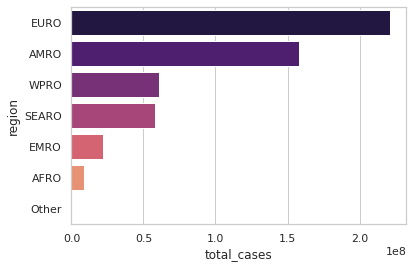

In [ ]:
#ploting the totalcases in decending order of number
sns.set_theme(style="whitegrid")
sns.barplot(x='total_cases',y='region',data=df_reg,palette="magma")

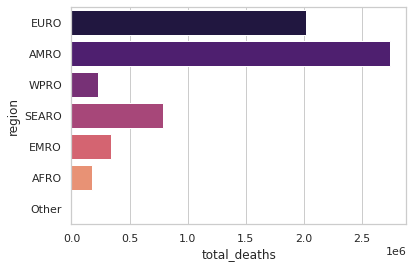

In [ ]:
sns.barplot(x='total_deaths',y='region',data=df_reg,palette="magma")

Q2. which countries have most and least number of total cases?

In [ ]:
#time interval for each country is of 833 days thatswhy we are taking values after each 883 iteration in cumulative cases to get the max cases
i=882
country = df['Country'].unique()
cases = []
reg = []

while  i < len(df['Country']):
  cases.append(df['Cumulative_cases'][i])
  reg.append(df['WHO_region'][i])
  i=i+883

df_cases=pd.DataFrame()
df_cases['Country']=country
df_cases['max_cases']=cases
df_cases['region']=reg


df_cases=df_cases.sort_values(by="max_cases",ascending=False)

In [ ]:
df_cases.head(10)

,Country,max_cases,region
226,United States of America,83551386,AMRO
96,India,43168585,SEARO
28,Brazil,31060017,AMRO
72,France,28687573,EURO
78,Germany,26452148,EURO
211,The United Kingdom,22305897,EURO
175,Russian Federation,18343964,EURO
171,Republic of Korea,18141835,WPRO
103,Italy,17457950,EURO
218,Turkey,15073722,EURO


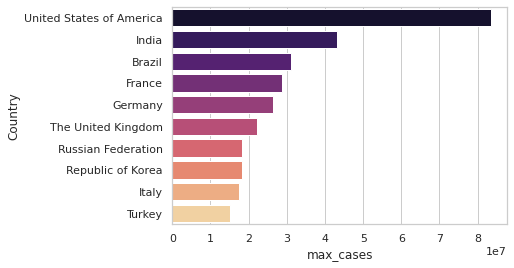

In [ ]:
#plot the top ten countries in term of total cases
sns.set_theme(style="whitegrid")
sns.barplot(x='max_cases',y='Country',data=df_cases.head(10),palette="magma")

In [ ]:
#last 10 
df_cases.tail(10)

,Country,max_cases,region
92,Holy See,26,EURO
129,Marshall Islands,18,WPRO
152,Niue,9,WPRO
144,Nauru,3,WPRO
221,Tuvalu,3,WPRO
219,Turkmenistan,0,EURO
214,Tokelau,0,WPRO
179,Saint Helena,0,AFRO
54,Democratic People's Republic of Korea,0,SEARO
166,Pitcairn Islands,0,WPRO


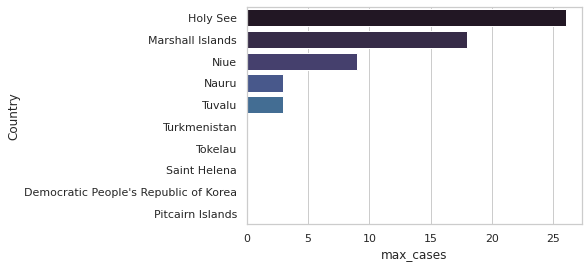

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='max_cases',y='Country',data=df_cases.tail(10),palette="mako")

Q3.  Which countries have most and least number of total deaths?

In [ ]:
#time interval for each country is of 833 days thatswhy we are taking values after each 883 iteration in cumulative death  to get the max deaths
i=882
country = df['Country'].unique()
cases = []
reg = []

while  i < len(df['Country']):
  cases.append(df['Cumulative_deaths'][i])
  reg.append(df['WHO_region'][i])
  i=i+883

df_deaths=pd.DataFrame()
df_deaths['Country']=country
df_deaths['max_deaths']=cases
df_deaths['region']=reg


df_deaths=df_deaths.sort_values(by="max_deaths",ascending=False)

In [ ]:
df_deaths.head(10)

,Country,max_deaths,region
226,United States of America,998070,AMRO
28,Brazil,666801,AMRO
96,India,524651,SEARO
175,Russian Federation,379363,EURO
134,Mexico,324951,AMRO
164,Peru,213205,AMRO
211,The United Kingdom,178749,EURO
103,Italy,166835,EURO
97,Indonesia,156604,SEARO
72,France,145123,EURO


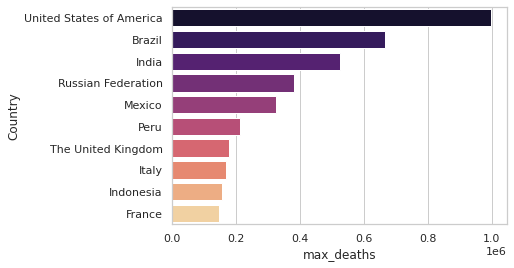

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='max_deaths',y='Country',data=df_deaths.head(10),palette="magma")

In [ ]:
df_deaths.tail(10)

,Country,max_deaths,region
219,Turkmenistan,0,EURO
152,Niue,0,WPRO
214,Tokelau,0,WPRO
179,Saint Helena,0,AFRO
68,Falkland Islands (Malvinas),0,AMRO
129,Marshall Islands,0,WPRO
135,Micronesia (Federated States of),0,WPRO
92,Holy See,0,EURO
166,Pitcairn Islands,0,WPRO
177,Saba,0,AMRO


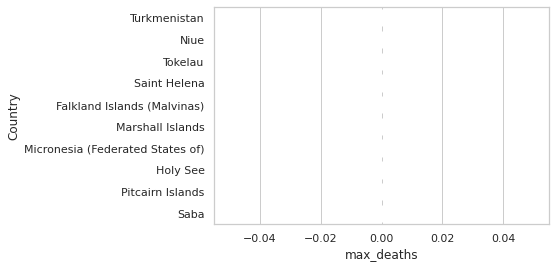

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='max_deaths',y='Country',data=df_deaths.tail(10),palette="mako")

Q4. Which country has highest death/case ratio ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


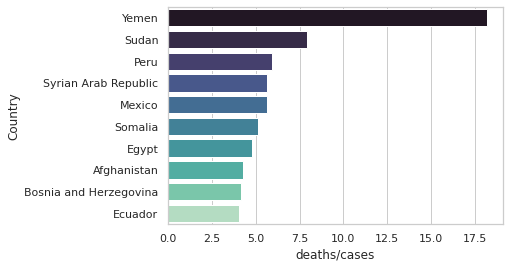

In [ ]:
#trying to plot the death/cases ratio doing the same thing of 833 iteration to get max death and max cases for each country
i=882
country = df['Country'].unique()
pecentage_death_case = []

while  i < len(df['Country']):
  pecentage_death_case.append((df['Cumulative_deaths'][i]/df['Cumulative_cases'][i])*100)
  i=i+883

df_deaths_cases=pd.DataFrame()
df_deaths_cases['Country']=country
df_deaths_cases['deaths/cases']=pecentage_death_case

df_deaths_cases=df_deaths_cases.sort_values(by="deaths/cases",ascending=False)

sns.set_theme(style="whitegrid")
sns.barplot(x='deaths/cases',y='Country',data=df_deaths_cases.head(10),palette="mako")

In [ ]:
df_deaths_cases.head(10)

,Country,deaths/cases
234,Yemen,18.177973
204,Sudan,7.923173
164,Peru,5.952913
208,Syrian Arab Republic,5.635668
134,Mexico,5.622936
199,Somalia,5.123283
61,Egypt,4.809473
0,Afghanistan,4.271723
26,Bosnia and Herzegovina,4.177283
60,Ecuador,4.058889


Q5. Does each region follow same pattern in cases increase ?

In [ ]:
#ploting the cases per day for each day
def region_plot(region):
  df_region = df[df['WHO_region']==region]
  plt.figure(figsize=(20,8))
  return sns.lineplot(data=df_region , x="Date_reported", y='New_cases', hue='Country_code',palette="dark:salmon_r",legend=False).set(title=region)

[Text(0.5, 1.0, 'EMRO')]

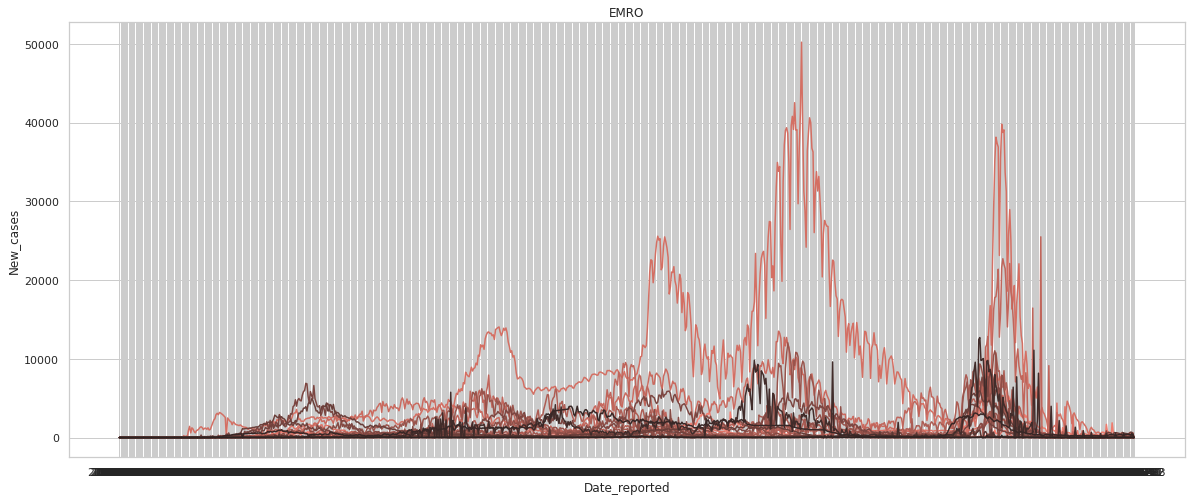

In [ ]:
region_plot('EMRO')

[Text(0.5, 1.0, 'EURO')]

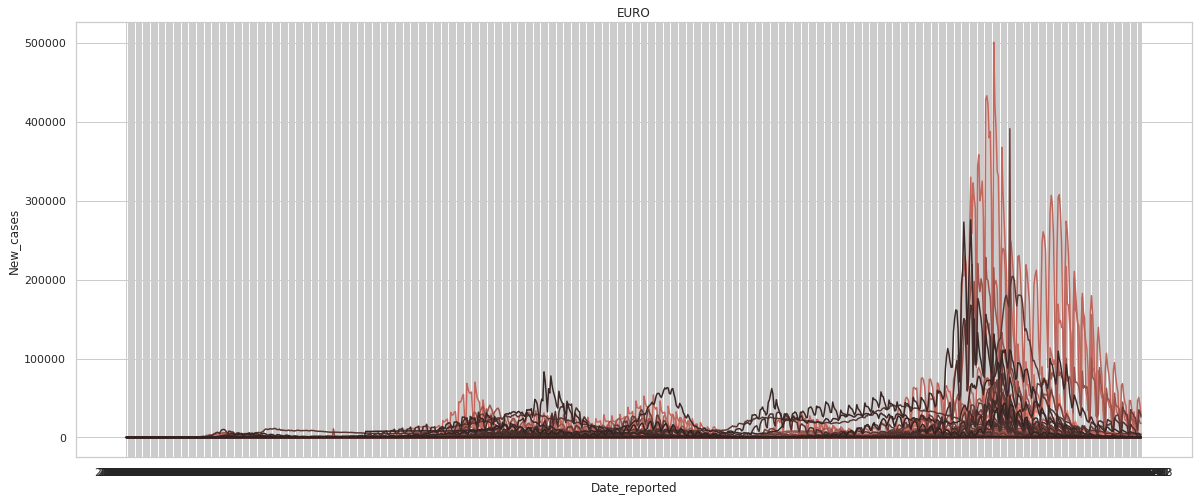

In [ ]:
region_plot('EURO')

[Text(0.5, 1.0, 'AFRO')]

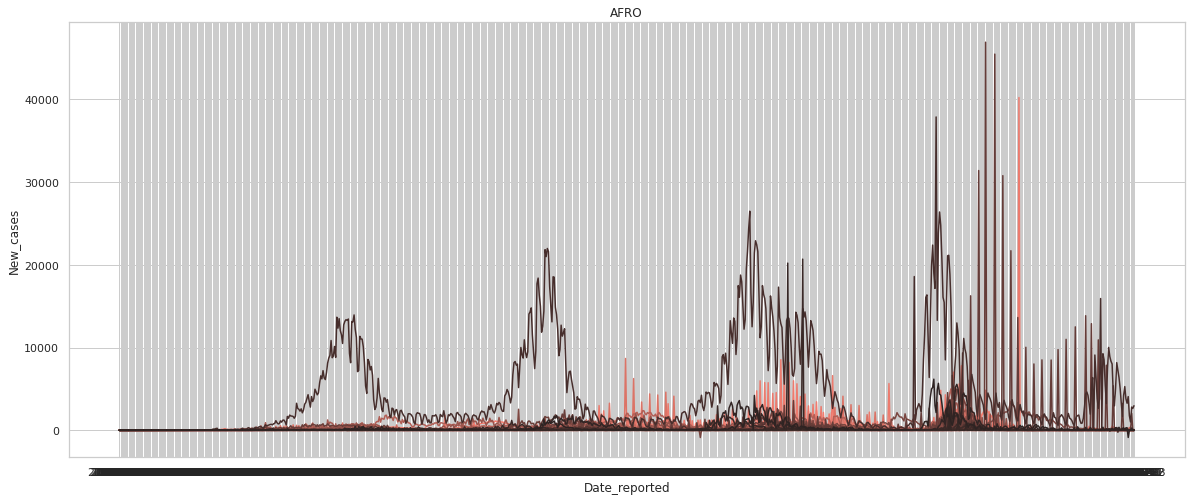

In [ ]:
region_plot('AFRO')

[Text(0.5, 1.0, 'WPRO')]

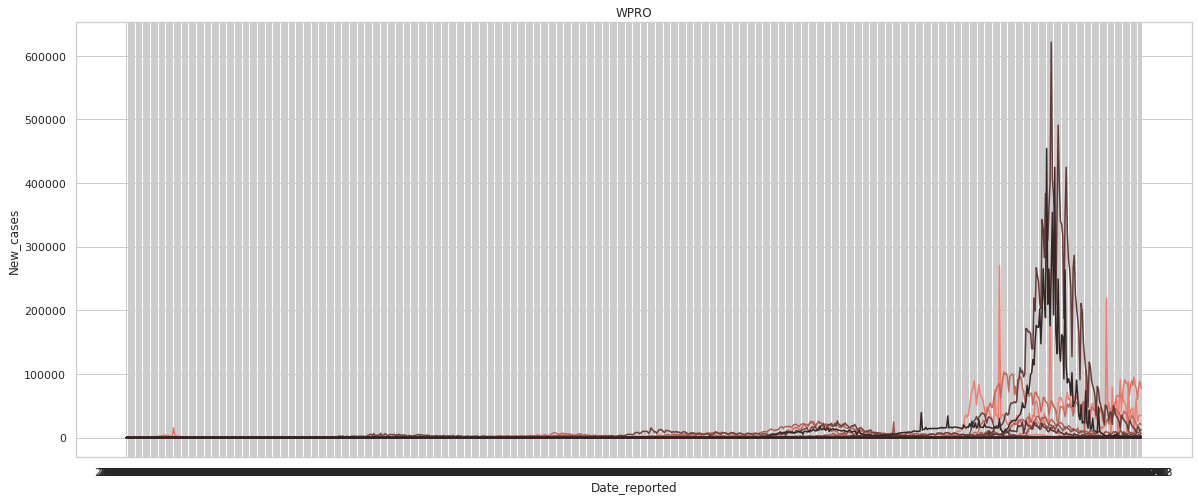

In [ ]:
region_plot('WPRO')

[Text(0.5, 1.0, 'AMRO')]

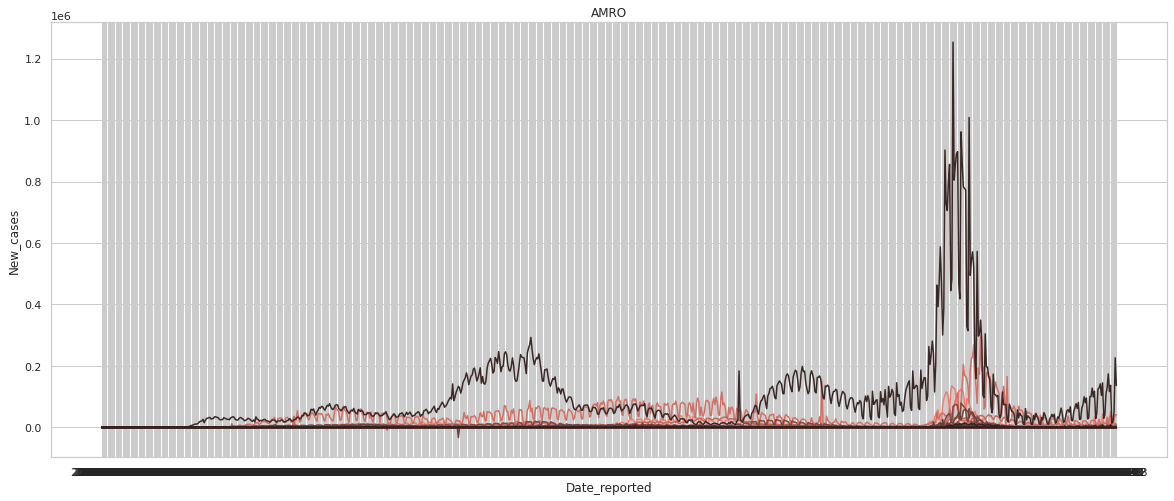

In [ ]:
region_plot('AMRO')

[Text(0.5, 1.0, 'SEARO')]

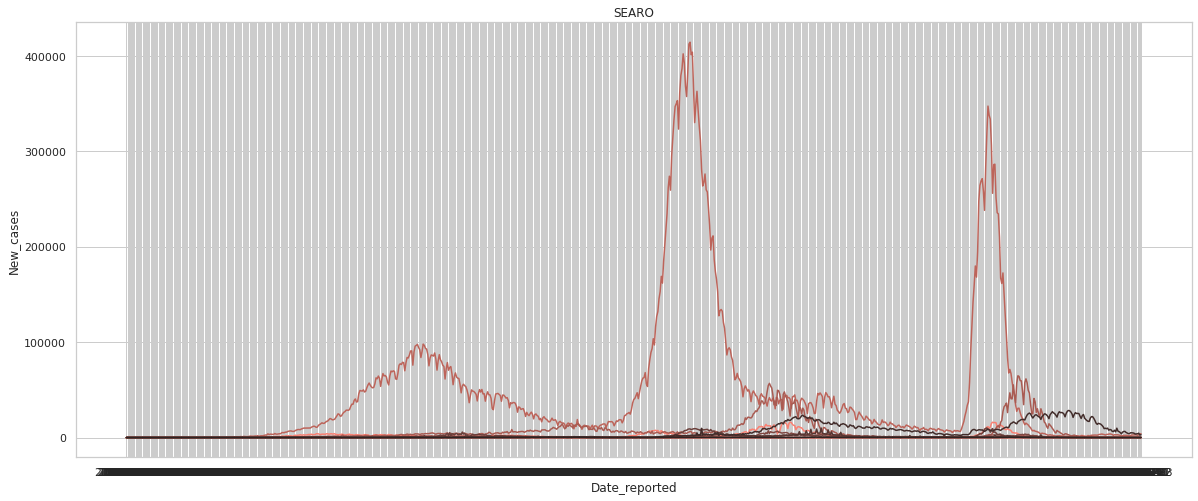

In [ ]:
region_plot('SEARO')

Q6. Does each region follow same pattern in deaths increase ?

In [ ]:
#ploting the deaths per day for each day
def region_death_plot(region):
  df_region = df[df['WHO_region']==region]
  plt.figure(figsize=(20,8))
  return sns.lineplot(data=df_region , x="Date_reported", y='New_deaths', hue='Country_code',palette="dark:salmon_r",legend=False).set(title=region)

[Text(0.5, 1.0, 'EMRO')]

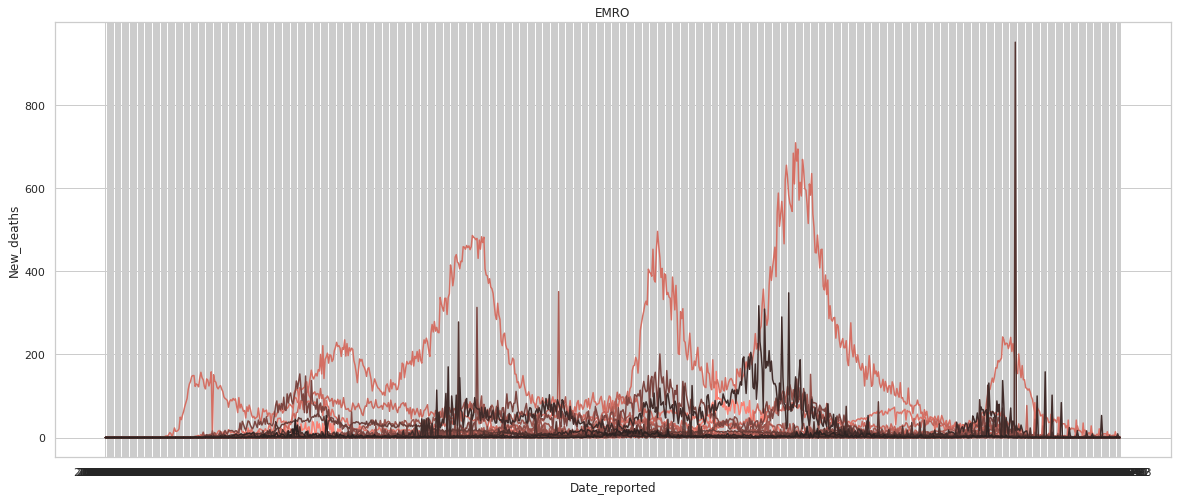

In [ ]:
region_death_plot('EMRO')

[Text(0.5, 1.0, 'EURO')]

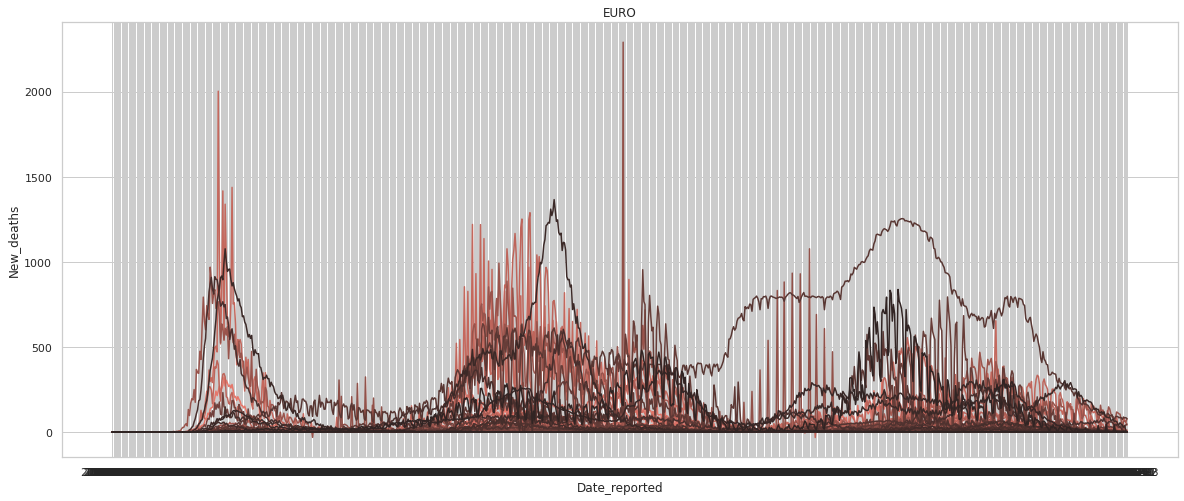

In [ ]:
region_death_plot('EURO')

[Text(0.5, 1.0, 'AFRO')]

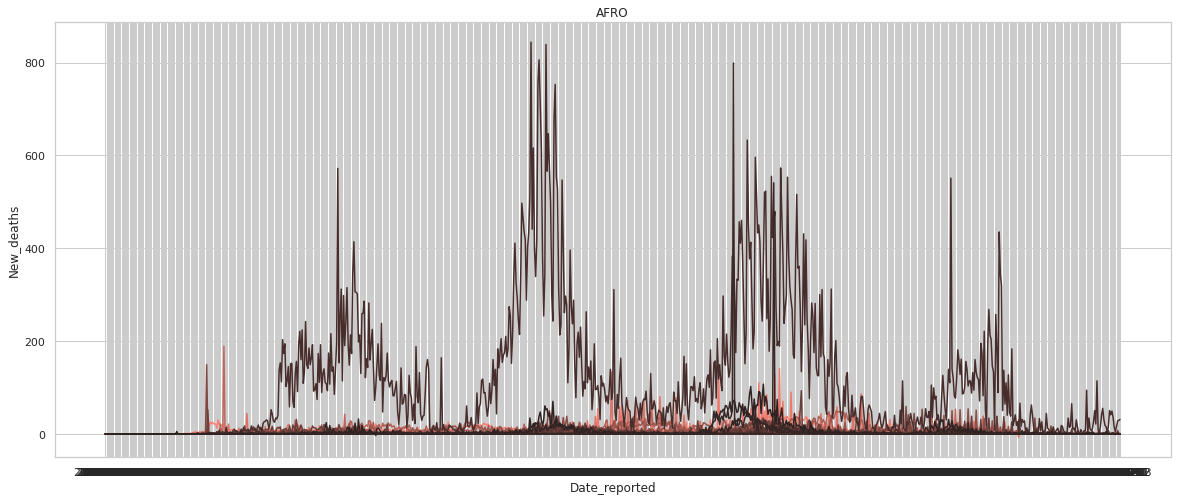

In [ ]:
region_death_plot('AFRO')

[Text(0.5, 1.0, 'WPRO')]

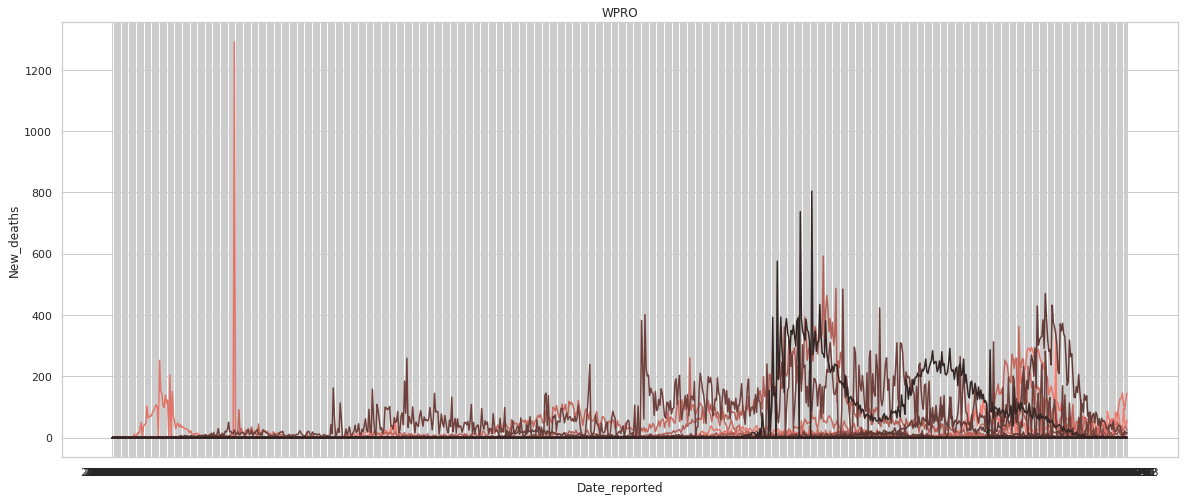

In [ ]:
region_death_plot('WPRO')

[Text(0.5, 1.0, 'AMRO')]

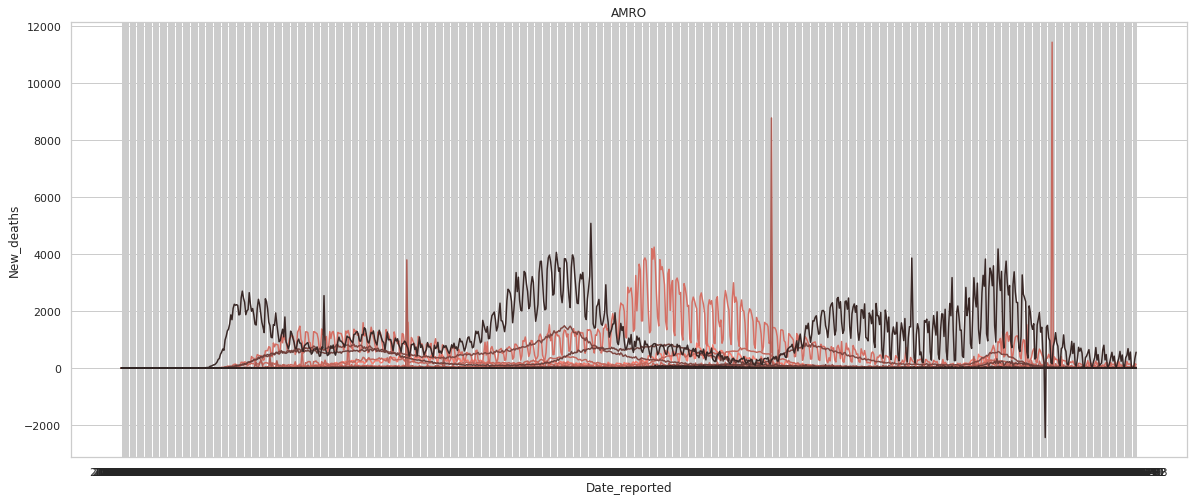

In [ ]:
region_death_plot('AMRO')

[Text(0.5, 1.0, 'SEARO')]

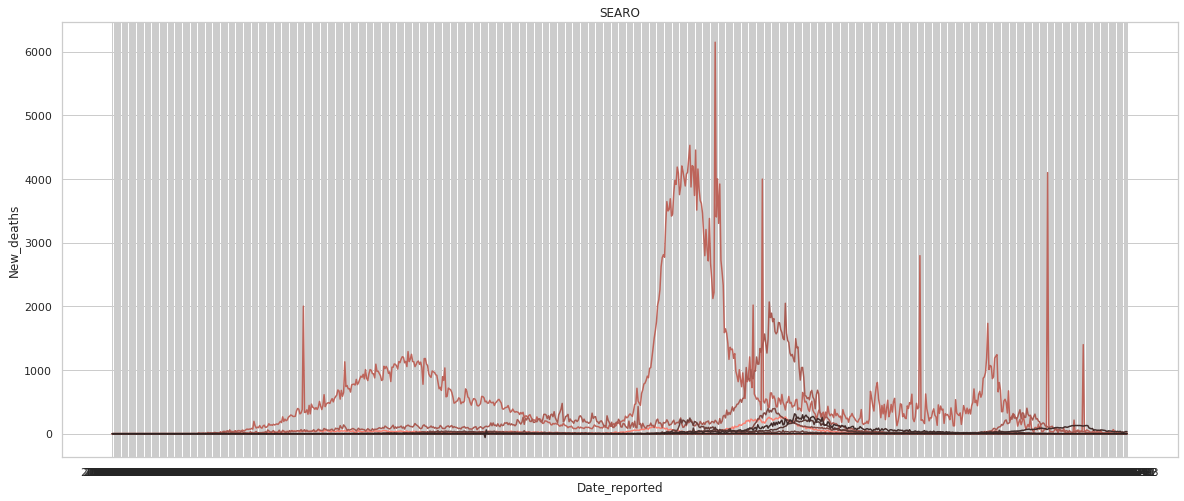

In [ ]:
region_death_plot('SEARO')